## Final Project Submission

Please fill out:
* Student name: James Brochhausen
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


In [333]:
# Your code here - remember to use markdown cells for comments as well!
import os, glob
os.listdir()

['LICENSE.md',
 'student.ipynb',
 'awesome.gif',
 'README.md',
 '.gitignore',
 'CONTRIBUTING.md',
 '.ipynb_checkpoints',
 '.learn',
 '.git',
 'module1_project_rubric.pdf',
 'zippedData']

In [334]:
os.listdir('zippedData/')

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [335]:
files_list = glob.glob('zippedData/*')
files_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
pd.read_csv(files_list[0])

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


## Notes on Files

I want to merge: ?

My questions: 
- Which genres are the most profitable over the past 20 years
- What rated films profited the most over the past 20 years
- What top 5 directors had the highest grossing movies over the past 20 years
- What month of the year has the global gross profit / box office?
- What's the average budget spent on films over the past 20 years? Or which budget has the highest ROI on average?
- Take a look at profits

I'll be able to present what genre, film rating, 5 directors and month and budget that'll be the most profitable for Microsoft.

Join / merge 1, 2 = g

### Columns of interest

#### IMDB
- DF 1
    - imdb.movies.csv.gz
    - Columns of interest:
    - genre_ids, id, popularity, release_date, title, vote_average, vote_count
- DF 2
    - imdb.title.akas.csv.gz
    - Columns of interest:
    - title, region, 
- DF 3
    - imdb.title.ratings.csv.gz
    - Columns of interest:
    - tconst, averagerating, numvotes
- DF 4
    - imdb.name.basics.csv.gz
    - Columns of interest:
    - nconst, primary_name, primary_profession, known_for_titles
- DF 6
    - imdb.title.basics.csv.gz
    - Columns of interest:
    - tconst, primary_title, start_year, runtime_minutes, genres

#### Rotten Tomatoes
- DF 5
    - rt.reviews.tsv.gz
    - Columns of interest:
    - No columns of interest
- DF 7
    - rt.movie_info.tsv.gz
    - Columns of interest:
    - rating, genre, director, writer, theater_date, box_office, runtime
    
#### Miscellaneous
- DF 8
    - tn.movie_budgets.csv.gz
    - Columns of interest:
    - release_date, id, movie, production_budget, domestic_gross, worldwide_gross
- DF 9
    - bom.movie_gross.csv.gz
    - Columns of interest:
    - title, domestic_gross, foreign_gross, year
    
    
#### Columns of no interest
- DF 0
    - imdb.title.crew.csv.gz
    - Column names are of no interest
- DF 10
    - imdb.title.principals.csv.gz
    - Columns of interest:
    - No columns of interest

In [338]:
DATA = {}
for file in files_list:
    key = file.split('/')[-1]
    print(file)
    try:
        df = pd.read_csv(file)
    except:
        df = pd.read_csv(file, sep='\t',encoding = 'Latin-1')
    DATA[key] = df

zippedData/imdb.title.crew.csv.gz
zippedData/tmdb.movies.csv.gz
zippedData/imdb.title.akas.csv.gz
zippedData/imdb.title.ratings.csv.gz
zippedData/imdb.name.basics.csv.gz
zippedData/rt.reviews.tsv.gz
zippedData/imdb.title.basics.csv.gz
zippedData/rt.movie_info.tsv.gz
zippedData/tn.movie_budgets.csv.gz
zippedData/bom.movie_gross.csv.gz
zippedData/imdb.title.principals.csv.gz


In [339]:
for filename, df in DATA.items():
    print(filename)
    print(len(df))
    display(df.head())
    print()

imdb.title.crew.csv.gz
146144


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



tmdb.movies.csv.gz
26517


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



imdb.title.akas.csv.gz
331703


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



imdb.title.ratings.csv.gz
73856


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



imdb.name.basics.csv.gz
606648


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



rt.reviews.tsv.gz
54432


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"



imdb.title.basics.csv.gz
146144


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



rt.movie_info.tsv.gz
1560


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN



tn.movie_budgets.csv.gz
5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



bom.movie_gross.csv.gz
3387


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



imdb.title.principals.csv.gz
1028186


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


## Most Profitable Month - Done

In [625]:
df_tn_budget['release_date'] = pd.to_datetime(df_tn_budget['release_date'])
df_tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits,Month
1355,56,2002-01-25,The Mothman Prophecies,42000000.0,35228696.0,56438555.0,14438555.0,Jan
4798,99,1998-01-16,The Dress,2650000.0,16556.0,16556.0,-2633444.0,Jan
919,20,1997-01-10,The Relic,60000000.0,33956608.0,33956608.0,-26043392.0,Jan
4865,66,2016-01-19,Eden,2300000.0,0.0,0.0,-2300000.0,Jan
4406,7,2006-01-06,Hostel,4800000.0,47326473.0,82241110.0,77441110.0,Jan


In [626]:
# Creating a new columns called months
df_tn_budget["Month"] = pd.to_datetime(df_tn_budget['release_date'], format='%b', errors='coerce').dt.month
df_tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits,Month
1355,56,2002-01-25,The Mothman Prophecies,42000000.0,35228696.0,56438555.0,14438555.0,1
4798,99,1998-01-16,The Dress,2650000.0,16556.0,16556.0,-2633444.0,1
919,20,1997-01-10,The Relic,60000000.0,33956608.0,33956608.0,-26043392.0,1
4865,66,2016-01-19,Eden,2300000.0,0.0,0.0,-2300000.0,1
4406,7,2006-01-06,Hostel,4800000.0,47326473.0,82241110.0,77441110.0,1


In [627]:
'https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name'
#Getting the mean of each month
most_profitable_months = (df_tn_budget.groupby(df_tn_budget['Month'])['Profits'].mean())
most_profitable_months

Month
1     2.572033e+07
2     4.349811e+07
3     4.985129e+07
4     3.611743e+07
5     1.151328e+08
6     9.942391e+07
7     9.841746e+07
8     3.542232e+07
9     2.488078e+07
10    2.907190e+07
11    9.314157e+07
12    6.844157e+07
Name: Profits, dtype: float64

In [628]:
# Putting names of month rather than the number
'https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name'
import calendar
df_tn_budget['Month'] = df_tn_budget['Month'].apply(lambda x: calendar.month_abbr[x])

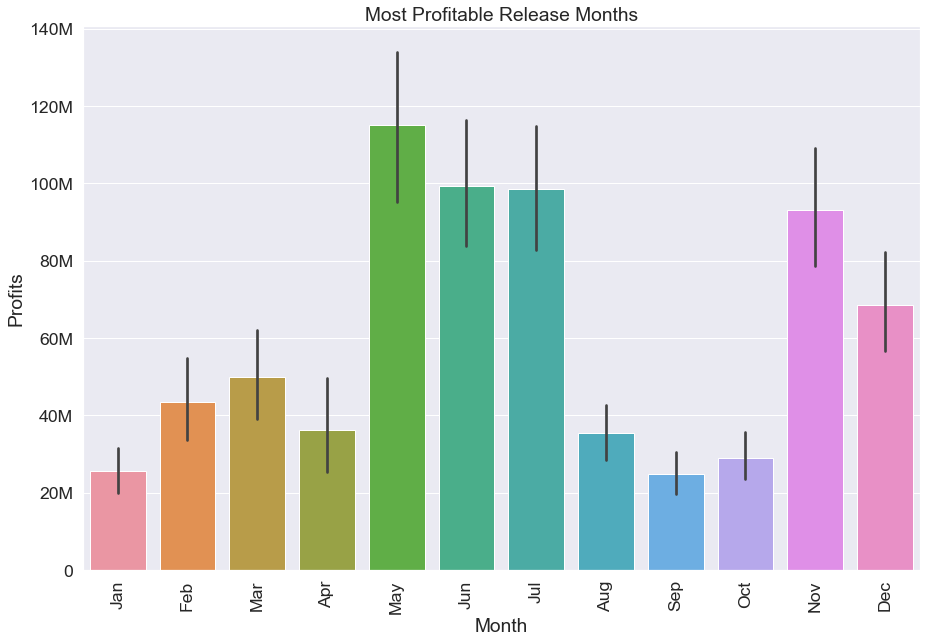

In [629]:
new_figure = plt.figure(figsize=(15,10))
ax = plt.axes()
sns.barplot(x = 'Month', y = 'Profits', data = df_tn_budget,).set_title('Most Profitable Release Months')
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));

## Budget = Basically Done
### What's the average budget spent? What average budget had the highest ROI?

In [461]:
df_tn_budget['Profits'] = (df_tn_budget['worldwide_gross'] - df_tn_budget['production_budget'])

In [483]:
df_tn_budget.sort_values(by = ['Profits'], ascending = False, inplace = True)
df_tn_budget.head(100)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
...,...,...,...,...,...,...,...
2159,60,"Feb 25, 2004",The Passion of the Christ,25000000.0,370782930.0,6.223419e+08,5.973419e+08
49,50,"Jun 30, 2004",Spider-Man 2,200000000.0,373524485.0,7.951107e+08,5.951107e+08
126,27,"May 21, 2010",Shrek Forever After,165000000.0,238736787.0,7.562447e+08,5.912447e+08
159,60,"May 15, 2003",The Matrix Reloaded,150000000.0,281553689.0,7.385769e+08,5.885769e+08


In [570]:
display(df_tn_budget.describe())
df = df_tn_budget.drop(['worldwide_gross', 'domestic_gross', 'id', 'movie','release_date'], axis = 1)
df.head()

#finding correlation
correlation = df.corr()

,id,production_budget,domestic_gross,worldwide_gross,Profits
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09


In [495]:
# df.plot(kind = 'hist')
#Tried a histogram here

In [475]:
budget_mean = df_tn_budget['production_budget'].mean()
budget_mean

31587757.0965064

In [562]:
# 'https://matplotlib.org/3.2.1/gallery/ticks_and_spines/custom_ticker1.html'

# from matplotlib.ticker import FuncFormatter
# def millions(x, pos):
#     return '$ %1.0fM' % (x * 1e-6)
# formatter = FuncFormatter(millions)

In [563]:
# fig, ax = plt.subplots()
# plt.figure(figsize=(20,5))
# g = sns.barplot(x= df_tn_budget['production_budget'][:100], y = df_tn_budget['Profits'][:100])
# plt.xticks(rotation = 90)
# plt.yaxis.set_major_formatter(formatter);
# # xlabels = ['{:,.0f}'.format(x) + 'MM' for x in g.get_xticks()]
# # g.set_xticklabels(xlabels);
# # plt.axvline(31587757);

In [564]:
'https://dfrieds.com/data-visualizations/how-format-large-tick-values.html'

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [565]:
# new_figure = plt.figure(figsize=(20,10))
# ax = plt.axes()
# sns.barplot(x= df_tn_budget['production_budget'][:250],
#             y = df_tn_budget['Profits'][:250],
#             ax=ax).set_title('Profits vs. Budget', fontsize = 25)
# plt.xticks(rotation = 90)
# ax.xaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values))
# ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));
# sns.regression(x= df_tn_budget['production_budget'][:250],y = df_tn_budget['Profits'][:250],ax=ax);;

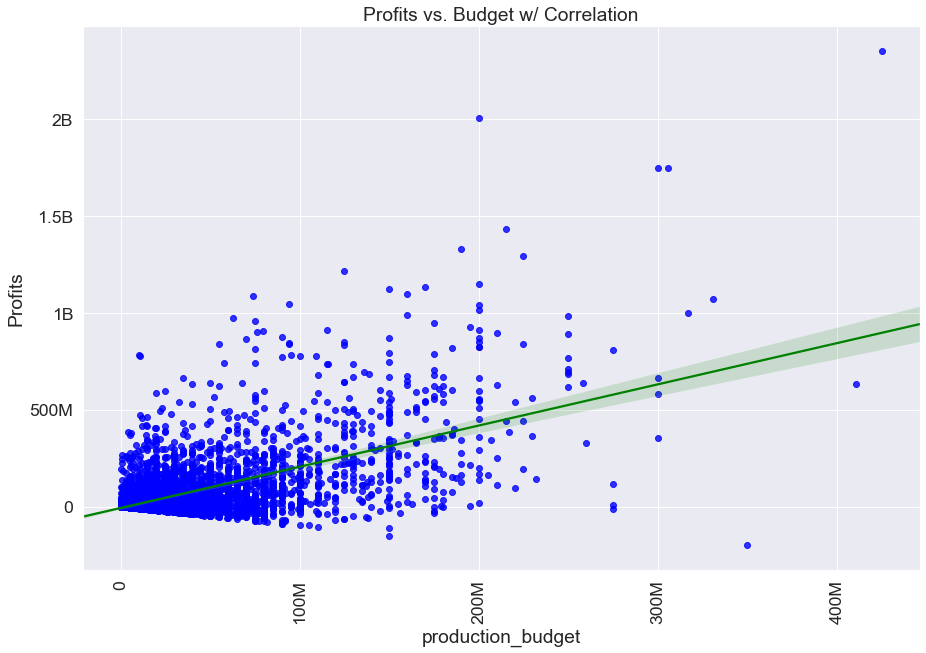

In [574]:
new_figure = plt.figure(figsize=(15,10))
ax = plt.axes()
sns.regplot(x = 'production_budget', y = 'Profits', data = df_tn_budget, color = 'blue', line_kws = {'color':'green'}).set_title('Profits vs. Budget w/ Correlation')
plt.xticks(rotation = 90)
ax.xaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values))
ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));

In [580]:
#correlation between profits and budget
corr = correlation['Profits'][0]
round(corr, 2)


0.61

In [543]:
# new_figure = plt.figure(figsize=(20,5))
# ax = plt.axes()
# sns.barplot(x= df_tn_budget['production_budget'][:100], y = df_tn_budget['Profits'][:100], ax=ax)
# plt.xticks(rotation = 90)
# ax.yaxis.set_major_formatter(formatter)
# # ax.xaxis.set_major_formatter(formatter);

In the above graph we're able to look at the top 100 highest grossing movies of all time compared to their production budget. The production budget falls within the top 100. My recommendation to Microsoft, is to expect to pay $31,587,757 to yield the highest possibility of a profit.

## Genre / Worldwide gross DF

In [340]:
df_tn_budget = pd.read_csv(files_list[8])

In [341]:
df_imdb_genres = pd.read_csv(files_list[6])

In [342]:
# Merging two dataframes to compare genres and worldwide_gross
df_merge = pd.merge(df_tn_budget, df_imdb_genres, left_on = 'movie', right_on = 'primary_title')
df_merge

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,NaN
3811,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,tt6616538,Bang,Bang,2015,NaN,NaN
3812,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [343]:
# Viewing which columns have null values in df_merge
df_merge.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         1
start_year             0
runtime_minutes      487
genres                72
dtype: int64

In [344]:
# Testing how to convert string to integers, while removing symbols
test = df_merge['domestic_gross'][0]
test

'$760,507,625'

In [345]:
type(test)

str

In [346]:
test.replace(',','').replace('$','')

'760507625'

In [347]:
#converted production, domestic and worldwide into integers
df_merge['domestic_gross'] = df_merge['domestic_gross'].map(lambda x: float(x.replace(',','').replace('$','')))

In [348]:
df_merge['production_budget'] = df_merge['production_budget'].map(lambda x: float(x.replace(',','').replace('$','')))

In [349]:
df_merge['worldwide_gross'] = df_merge['worldwide_gross'].map(lambda x: float(x.replace(',','').replace('$','')))

In [350]:
df_merge

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt5936960,Cure,Cure,2014,NaN,NaN
3811,70,"Apr 1, 1996",Bang,10000.0,527.0,5.270000e+02,tt6616538,Bang,Bang,2015,NaN,NaN
3812,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [351]:
#removed columns with null values in genre
df_merge = df_merge[df_merge['genres'].notna()]
df_merge.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      434
genres                 0
dtype: int64

In [352]:
df_merge['Profits'] = (df_merge['worldwide_gross'] - df_merge['production_budget'])
df_merge.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",1.072414e+09
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",1.748134e+09


In [353]:
df_merge['genres'] = df_merge['genres'].str.split(",")
df_merge.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,[Horror],2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]",6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]",-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]",1.072414e+09
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",1.748134e+09


In [397]:
common_genres = ['Comedy','Drama','Thriller','Fantasy','Romance','Horror',
                 'Action','Crime','Sci-Fi','War','Mystery','Animation']

for genre in common_genres:
    genre_dict = {}
    df_merge['genres'].str.contains(genre)
    genre_df = df_merge['genres'].str.contains(genre)
    display(genre_df.head())
#     genre_dict[genre] = genre_df['Profits']
    
    
# genre_dict = {}


# for genre in common_genres:
#     genre_dict[genre] = []
#     for i, bol in enumerate(df_merge['genres'].str.contains(genre)):
#         if bol == True:
#             if df_merge['Profits'][i] > 0:
#                 genre_dict[genre].append(df_merge['Profits'][i])


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: genres, dtype: float64

In [318]:
df_merge["genres"].iloc[1][0]

'Action'

## Directors

- Which rated movie is the most profitable over the past 20 years?

In [384]:
df_director_code = pd.read_csv(files_list[0])
df_director_code.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [385]:
df_director_name = pd.read_csv(files_list[4])
df_director_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [386]:
df_dir_name = pd.merge(df_director_code, df_director_name, left_on='directors', right_on='nconst')
df_dir_name.head()

#join using tconst rather than the nconst, take a look at the table below t const

,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0285252,nm0899854,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774"
1,tt0462036,nm1940585,nm1940585,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer","tt0462036,tt6740510"
2,tt0835418,nm0151540,"nm0310087,nm0841532",nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745"
3,tt0859635,nm0151540,"nm0151540,nm0373571,nm0501399,nm0815418,nm0831479",nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745"
4,tt0879859,nm2416460,NaN,nm2416460,Eric Manchester,NaN,NaN,"director,writer","tt0879861,tt0879859"


In [355]:
df_imdb_genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [388]:
new_merge = pd.merge(df_dir_name, df_imdb_genres, left_on='tconst', right_on='tconst')
new_merge.head()

,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0285252,nm0899854,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",Life's a Beach,Life's a Beach,2012,100.0,Comedy
1,tt0462036,nm1940585,nm1940585,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer","tt0462036,tt6740510",Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama
2,tt0835418,nm0151540,"nm0310087,nm0841532",nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745",The Babymakers,The Babymakers,2012,95.0,Comedy
3,tt0859635,nm0151540,"nm0151540,nm0373571,nm0501399,nm0815418,nm0831479",nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745",Super Troopers 2,Super Troopers 2,2018,99.0,"Comedy,Crime,Mystery"
4,tt0879859,nm2416460,NaN,nm2416460,Eric Manchester,NaN,NaN,"director,writer","tt0879861,tt0879859",Torn,Torn,2010,NaN,Thriller


In [366]:
df_tn_budget['domestic_gross'] = df_tn_budget['domestic_gross'].map(lambda x: float(x.replace(',','').replace('$','')))
df_tn_budget['production_budget'] = df_tn_budget['production_budget'].map(lambda x: float(x.replace(',','').replace('$','')))
df_tn_budget['worldwide_gross'] = df_tn_budget['worldwide_gross'].map(lambda x: float(x.replace(',','').replace('$','')))

In [389]:
new_merge = pd.merge(df_tn_budget, new_merge, left_on='movie', right_on='original_title')
new_merge.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",nm1334526,Simon Kinberg,1973.0,NaN,"producer,writer,director","tt1502712,tt3315342,tt1877832,tt3659388",Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,nm0811583,"nm0796950,nm0795975,nm0006516,nm0811583,nm0923...",nm0811583,Zack Snyder,1966.0,NaN,"producer,director,writer","tt0770828,tt0451279,tt0409459,tt0416449",Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
4,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,tt2379713,nm0005222,"nm0517589,nm0701031,nm0905498,nm0125336,nm0001220",nm0005222,Sam Mendes,1965.0,NaN,"producer,director,miscellaneous","tt0959337,tt1074638,tt0257044,tt0169547",Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller"


## LITERALLY WTF

In [362]:
#COME BACK TO it just got rid of Avatar, 

# newest_merge = pd.merge(new_merge, df_tn_budget, left_on = 'primary_title', right_on='movie')
# newest_merge = newest_merge[newest_merge.primary_name != ('Atsushi Wada')]
# newest_merge = newest_merge[newest_merge.primary_name != ('Ravi Punj')]
# newest_merge = newest_merge[newest_merge.primary_name != ('Colin Trevorrow')]
# newest_merge = newest_merge[newest_merge.primary_name != ('James Wan')]
# newest_merge = newest_merge[newest_merge.primary_name != ('Joss Whedon')]
# newest_merge.head()

In [390]:
#Organizing data by highest world gross
new_merge.sort_values(by=['worldwide_gross'], ascending = False, inplace = True)
new_merge.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres
37,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,tt8852130,nm10047650,nm10047650,nm10047650,Ravi Punj,NaN,NaN,"director,writer,producer",tt8852130,Titanic,Titanic,2018,115.0,Family
20,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,tt0369610,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
14,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,tt0848228,nm0923736,"nm0923736,nm0672015",nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
36,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,tt1825683,nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",nm3363032,Ryan Coogler,1986.0,NaN,"director,writer,producer","tt1825683,tt6343314,tt2334649,tt3076658",Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"


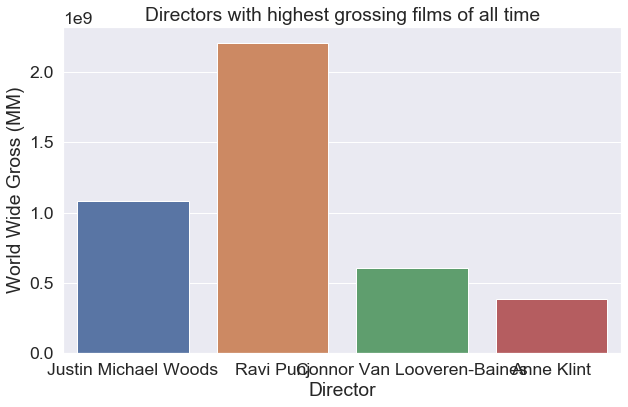

In [378]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)

sns.set_style('darkgrid')
sns.set(font_scale= 1.6)

ax = sns.barplot(x = 'primary_name', 
            y = 'worldwide_gross', 
            ax=ax,
            data = new_merge.head()).set(xlabel='Director',
            ylabel='World Wide Gross (MM)',
            title = 'Directors with highest grossing films of all time');

In [166]:
df_ratings = pd.read_csv(files_list[7], sep='\t',encoding = 'Latin-1')

In [167]:
# Checking for null values in ratings
df_ratings.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [251]:
df_ratings.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [252]:
df_tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [168]:
# Something wrong with this data... Walt decker did no direct all these movies!!!! NEED HELP
df_profit_ratings = pd.merge(df_tn_budget, df_ratings, left_on = 'release_date', right_on = 'theater_date')
df_profit_ratings.head()

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
1,56,"Dec 18, 2015",Alvin and the Chipmunks: The Road Chip,"$90,000,000","$85,886,987","$249,517,956",1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
2,57,"Dec 18, 2015",Sisters,"$30,000,000","$87,044,645","$106,030,660",1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
3,45,"Dec 18, 2015",Saul fia,"$1,700,000","$1,777,043","$9,696,537",1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
4,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100",304,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,"Mar 9, 2012","Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions


In [249]:
df_profit_ratings[df_profit_ratings.duplicated(subset = 'synopsis')]

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,56,"Dec 18, 2015",Alvin and the Chipmunks: The Road Chip,90000000.0,85886987.0,249517956.0,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
2,57,"Dec 18, 2015",Sisters,30000000.0,87044645.0,106030660.0,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
3,45,"Dec 18, 2015",Saul fia,1700000.0,1777043.0,9696537.0,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
6,1,"Mar 9, 2012",A Thousand Words,40000000.0,18450127.0,20790486.0,304,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,"Mar 9, 2012","Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions
7,1,"Mar 9, 2012",A Thousand Words,40000000.0,18450127.0,20790486.0,1424,From filmmaker Andrew Stanton comes John Carte...,PG-13,Action and Adventure|Horror|Kids and Family|Sc...,Andrew Stanton|Mark Atkins,Mark Atkins|Mark Andrews|Michael Chabon|Andrew...,"Mar 9, 2012","Jun 5, 2012",$,"73,058,679",118 minutes,Walt Disney Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,28,"Jan 1, 1993",Ed and his Dead Mother,1800000.0,673.0,673.0,311,"In Fiorile (US title: Wild Flower), Italy's Ta...",PG-13,Art House and International|Drama,Paolo Taviani|Vittorio Taviani,Paolo Taviani|Vittorio Taviani|Sandro Petraglia,"Jan 1, 1993","Apr 1, 2008",NaN,NaN,120 minutes,NaN
2051,28,"Jan 1, 1993",Ed and his Dead Mother,1800000.0,673.0,673.0,548,"Based upon a play by screenwriter Brad Fraser,...",R,Comedy|Drama,Denys Arcand,NaN,"Jan 1, 1993","Jan 23, 1996",NaN,NaN,100 minutes,NaN
2052,28,"Jan 1, 1993",Ed and his Dead Mother,1800000.0,673.0,673.0,694,"In this suspenseful horror movie, a mother des...",R,Drama|Mystery and Suspense,Yves Simoneau,Barry Schneider|Richard Hawley,"Jan 1, 1993","May 15, 2001",NaN,NaN,95 minutes,NaN
2053,28,"Jan 1, 1993",Ed and his Dead Mother,1800000.0,673.0,673.0,1941,Household Saints is a leisurely-paced portrait...,R,Comedy|Drama|Faith and Spirituality,Nancy Savoca,Nancy Savoca|Richard Guay,"Jan 1, 1993","Jul 6, 1994",NaN,NaN,124 minutes,NaN


In [169]:
# removing null values from genres, only 3, so no big deal
df_profit_ratings = df_profit_ratings[df_profit_ratings['rating'].notna()]
df_profit_ratings.isna().sum()

id_x                   0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
id_y                   0
synopsis               1
rating                 0
genre                  0
director             240
writer               364
theater_date           0
dvd_date               0
currency             865
box_office           865
runtime               15
studio               549
dtype: int64

In [170]:
# Converting following columns to integers
df_profit_ratings['domestic_gross'] = df_profit_ratings['domestic_gross'].map(lambda x: float(x.replace(',','').replace('$','')))
df_profit_ratings['production_budget'] = df_profit_ratings['production_budget'].map(lambda x: float(x.replace(',','').replace('$','')))
df_profit_ratings['worldwide_gross'] = df_profit_ratings['worldwide_gross'].map(lambda x: float(x.replace(',','').replace('$','')))

In [172]:
df_profit_ratings.head()

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
1,56,"Dec 18, 2015",Alvin and the Chipmunks: The Road Chip,90000000.0,85886987.0,2.495180e+08,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
2,57,"Dec 18, 2015",Sisters,30000000.0,87044645.0,1.060307e+08,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
3,45,"Dec 18, 2015",Saul fia,1700000.0,1777043.0,9.696537e+06,1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox
4,14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,304,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,"Mar 9, 2012","Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions


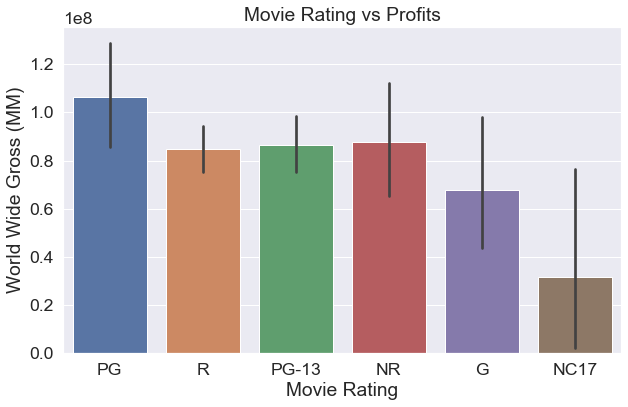

In [253]:
# Creating my barplot, starting with the figure size
fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)

sns.set_style('darkgrid')
sns.set(font_scale= 1.6)

ax = sns.barplot(x = 'rating', 
            y = 'worldwide_gross', 
            ax=ax,
            data = df_profit_ratings).set(xlabel='Movie Rating',
            ylabel='World Wide Gross (MM)',
            title = 'Movie Rating vs Profits');